<a href="https://colab.research.google.com/github/DrDataScience-dentist/ORTHO-AI/blob/main/ORTHO_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

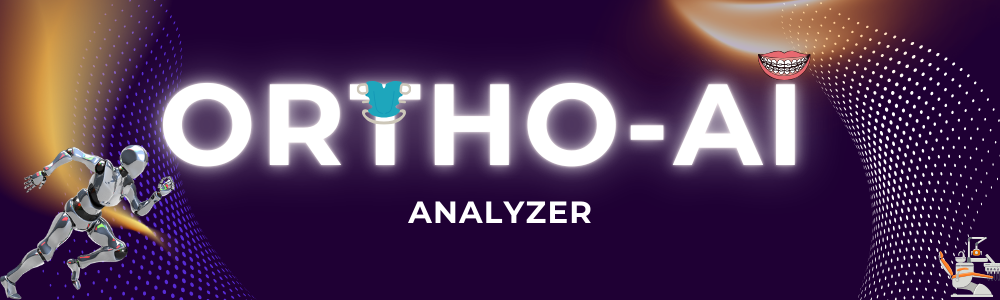


**!! HI GUYS**



We **Balaganesh**, **Gopi** and **Aishwarya** from **Sri Venkateswara Dental College**. This Notebook is to evaluate intraoral images for orthodontic features by using **Computer Vision**


**Before you start**, if you encounter any issues or have any doubts, feel free to ping me on any of the social media platforms listed below. You can also view my dataset and required files in my GitHub repository..


[![GMAIL](https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white)](mailto:drbalaganesh.dentist@gmail.com) [![INSTAGRAM](https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white)](https://www.instagram.com/_bala.7601/) [![LINKDIN](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/drbalaganeshdentist/) [![GITHUB](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/DrDataScience-dentist/ORTHO-AI)








**GUIDE**


---
first need to run every code to get no error

1.   PREREQUISITES
2.   UPLOAD IMAGES
3.   TEST IT WITH AI MODEL AND SAVE IT IN PDF

Image Upload Process:
Use the file upload option in the Google Colab interface to upload the five required images.

Order the images correctly (do not mix them up):

* frontal.jpg (Frontal View)
* right_lateral.jpg (Right Lateral View)
* left_lateral.jpg (Left Lateral View)
* upper_occlusal.jpg (Upper Occlusal View)
* lower_occlusal.jpg (Lower Occlusal View)
* Upload images using the following method:

**Every upload cell there will be upload window below it after the playing the cell**

Make sure to upload them one at a time in the order listed, and do not mix them up.

  





# **PREREQUISITES**


In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

!git clone https://github.com/DrDataScience-dentist/ORTHO-AI.git

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/107.7 GB disk)
Cloning into 'ORTHO-AI'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 35 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 50.39 MiB | 14.91 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
from google.colab import files
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# **UPLOAD IMAGES**

**UPLOAD FRONTAL IMAGES**


> After running the below cell there will be upload window  please upload only **FRONTAL IMAGE**



In [4]:

from google.colab import files
import os

!mkdir -p uploaded_images
new_filename = "frontal.jpg"
file_path = os.path.join("uploaded_images", new_filename)
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Previous frontal image deleted: {new_filename}")
print("Upload the frontal image:")
uploaded = files.upload()
for filename in uploaded.keys():
    os.rename(filename, file_path)
    print(f"Frontal image uploaded and renamed to: {new_filename}")
print("\nUploaded images:")
!ls uploaded_images


Upload the frontal image:


Saving Frontal-occlusion_JPG.rf.9c62eeb3d16c44549b286cb2d389b558.jpg to Frontal-occlusion_JPG.rf.9c62eeb3d16c44549b286cb2d389b558.jpg
Frontal image uploaded and renamed to: frontal.jpg

Uploaded images:
frontal.jpg


**UPLOAD RIGHT LATERAL IMAGES**


> After running the below cell there will be upload window  please upload only **RIGHT LATERAL IMAGES**

In [5]:
new_filename = "right_lateral.jpg"
file_path = os.path.join("uploaded_images", new_filename)
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Previous right lateral image deleted: {new_filename}")
print("Upload the right lateral image:")
uploaded = files.upload()
for filename in uploaded.keys():
    os.rename(filename, file_path)
    print(f"Right lateral image uploaded and renamed to: {new_filename}")
print("\nUploaded images:")
!ls uploaded_images

Upload the right lateral image:


Saving IMG_1094_JPG.rf.96441b1cd51ec607c949210cdf93a835.jpg to IMG_1094_JPG.rf.96441b1cd51ec607c949210cdf93a835.jpg
Right lateral image uploaded and renamed to: right_lateral.jpg

Uploaded images:
frontal.jpg  right_lateral.jpg


**UPLOAD LEFT LATERAL IMAGES**


> After running the below cell there will be upload window  please upload only **LEFT LATERAL IMAGES**

In [6]:
new_filename = "left_lateral.jpg"
file_path = os.path.join("uploaded_images", new_filename)
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Previous left lateral image deleted: {new_filename}")
print("Upload the left lateral image:")
uploaded = files.upload()
for filename in uploaded.keys():
    os.rename(filename, file_path)
    print(f"Left lateral image uploaded and renamed to: {new_filename}")
print("\nUploaded images:")
!ls uploaded_images

Upload the left lateral image:


Saving IMG_1093_JPG.rf.f5a5c6fd0f9970d77c8b6d7505a072ce.jpg to IMG_1093_JPG.rf.f5a5c6fd0f9970d77c8b6d7505a072ce.jpg
Left lateral image uploaded and renamed to: left_lateral.jpg

Uploaded images:
frontal.jpg  left_lateral.jpg  right_lateral.jpg


**UPLOAD UPPER OCCLUSAL IMAGES**


> After running the below cell there will be upload window  please upload only **UPPER OCCLUSAL IMAGES**

In [7]:
upper_filename = "upper_occlusal.jpg"
upper_file_path = os.path.join("uploaded_images", upper_filename)

if not os.path.exists("uploaded_images"):
    os.makedirs("uploaded_images")

if os.path.exists(upper_file_path):
    os.remove(upper_file_path)
    print(f"Previous upper occlusal image deleted: {upper_filename}")
print("Upload the upper occlusal image:")
uploaded_upper = files.upload()

for filename in uploaded_upper.keys():
    os.rename(filename, upper_file_path)
    print(f"Upper occlusal image uploaded and renamed to: {upper_filename}")
print("\nUploaded images:")
!ls uploaded_images


Upload the upper occlusal image:


Saving IMG_1107_JPG.rf.66c32d77bb3bce3ffe8ba5d6607e57f3.jpg to IMG_1107_JPG.rf.66c32d77bb3bce3ffe8ba5d6607e57f3.jpg
Upper occlusal image uploaded and renamed to: upper_occlusal.jpg

Uploaded images:
frontal.jpg  left_lateral.jpg  right_lateral.jpg  upper_occlusal.jpg


**UPLOAD LOWER OCCLUSAL IMAGES**


> After running the below cell there will be upload window  please upload only **LOWER OCCLUSAL IMAGES**

In [8]:
lower_filename = "lower_occlusal.jpg"
lower_file_path = os.path.join("uploaded_images", lower_filename)
if not os.path.exists("uploaded_images"):
    os.makedirs("uploaded_images")
if os.path.exists(lower_file_path):
    os.remove(lower_file_path)
    print(f"Previous lower occlusal image deleted: {lower_filename}")
print("Upload the lower occlusal image:")
uploaded_lower = files.upload()
for filename in uploaded_lower.keys():
    os.rename(filename, lower_file_path)
    print(f"Lower occlusal image uploaded and renamed to: {lower_filename}")
print("\nUploaded images:")
!ls uploaded_images

Upload the lower occlusal image:


Saving IMG_2559_JPG.rf.1b8984c4b10245b431deb79f8efd19e3.jpg to IMG_2559_JPG.rf.1b8984c4b10245b431deb79f8efd19e3.jpg
Lower occlusal image uploaded and renamed to: lower_occlusal.jpg

Uploaded images:
frontal.jpg  left_lateral.jpg  lower_occlusal.jpg  right_lateral.jpg  upper_occlusal.jpg


# **TEST IT WITH AI MODEL AND SAVE IT IN PDF**

In [23]:
from ultralytics import YOLO
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from google.colab import files

# Set up paths for models and images
model_paths = {
    "frontal": "/content/ORTHO-AI/FRONTAL AI/FRONTAL AI.pt",
    "right_lateral": "/content/ORTHO-AI/LATERAL AI MODEL/LATERAL.pt",
    "left_lateral": "/content/ORTHO-AI/LATERAL AI MODEL/LATERAL.pt",
    "upper_occlusal": "/content/ORTHO-AI/OCCLUSAL AI/occlusal.pt",
    "lower_occlusal": "/content/ORTHO-AI/OCCLUSAL AI/occlusal.pt"
}

image_paths = {
    "frontal": "/content/uploaded_images/frontal.jpg",
    "right_lateral": "/content/uploaded_images/right_lateral.jpg",
    "left_lateral": "/content/uploaded_images/left_lateral.jpg",
    "upper_occlusal": "/content/uploaded_images/upper_occlusal.jpg",
    "lower_occlusal": "/content/uploaded_images/lower_occlusal.jpg"
}

# Create a PDF to save results
output_pdf_path = "/content/Annotated_Orthodontic_Images.pdf"  # Save to current directory

# Initialize a list to store the overall predictions
all_predictions = []

# Function to generate a diagnosis based on predictions
def generate_diagnosis(predictions):
    # Simple example: You can enhance this logic based on the predictions
    features = set(predictions)

    diagnosis = "Orthodontic Diagnosis: \n"

    if "Class II" in features:
        diagnosis += "Class II Malocclusion detected.\n"
    elif "Class III" in features:
        diagnosis += "Class III Malocclusion detected.\n"
    else:
        diagnosis += "Class I Malocclusion detected.\n"

    if "Deep Bite" in features:
        diagnosis += "Deep Bite detected. Further consultation required.\n"
    if "Open Bite" in features:
        diagnosis += "Open Bite detected. Further consultation required.\n"

    if "Spacing" in features:
        diagnosis += "Spacing issues detected. Orthodontic treatment may be necessary.\n"

    # Add a final recommendation based on the features detected
    diagnosis += "\nRecommendation: Please consult with an orthodontist for detailed evaluation."

    return diagnosis

with PdfPages(output_pdf_path) as pdf:

    # Function to process an image with the appropriate model and save annotated image with predictions below it to PDF
    def process_image(image_type, model_path, image_path):
        if os.path.exists(image_path):
            print(f"Processing {image_type} image...")

            # Load model
            model = YOLO(model_path)

            # Load image
            image = Image.open(image_path)

            # Perform inference
            results = model.predict(source=image, conf=0.25)

            # Get predicted labels and corresponding bounding boxes
            labels = results[0].names  # Get the names of predicted labels
            predictions = [labels[int(cls)] for cls in results[0].boxes.cls]  # List of predicted labels

            # Add predictions to the overall list
            all_predictions.extend(predictions)

            # Visualize the results with annotations
            annotated_image = results[0].plot()  # Annotated image

            # Save the annotated image to the PDF
            plt.figure(figsize=(10, 10))
            plt.imshow(annotated_image)
            plt.axis('off')
            plt.title(f"{image_type.capitalize()} - Predictions")

            # Add the current annotated image to the PDF
            pdf.savefig()  # Save the annotated image into the PDF
            plt.close()    # Close the plot to free memory

            # Add the prediction text below the image
            plt.figure(figsize=(10, 2))
            plt.axis('off')
            prediction_text = ", ".join(predictions)  # Join all predictions as a string
            plt.text(0.5, 0.5, prediction_text, ha="center", va="center", fontsize=12)

            # Save the prediction text in the PDF
            pdf.savefig()  # Save the prediction text below the image
            plt.close()    # Close the plot to free memory

            print(f"{image_type.capitalize()} image processed and predictions saved to PDF.")
        else:
            print(f"No {image_type} image found at {image_path}")

    # Process all uploaded images, including the new upper and lower occlusal
    for image_type, model_path in model_paths.items():
        process_image(image_type, model_path, image_paths[image_type])

    # Generate overall diagnosis from all predictions
    diagnosis = generate_diagnosis(all_predictions)

    # Add overall diagnosis to the PDF
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.text(0.5, 0.5, diagnosis, ha="center", va="center", fontsize=14)

    # Save the overall diagnosis to the PDF
    pdf.savefig()
    plt.close()

print(f"\nAnnotated images and overall diagnosis have been saved to {output_pdf_path}")

# Trigger the automatic download of the generated PDF
files.download(output_pdf_path)


Processing frontal image...

0: 640x640 1 Midline diastema, 1 Proclination, 2 Spacings, 531.9ms
Speed: 2.6ms preprocess, 531.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Frontal image processed and predictions saved to PDF.
Processing right_lateral image...

0: 640x640 1 Class I, 1 Proclination, 2 Spacings, 510.9ms
Speed: 3.3ms preprocess, 510.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Right_lateral image processed and predictions saved to PDF.
Processing left_lateral image...

0: 640x640 1 Class III, 1 Proclination, 2 Spacings, 508.2ms
Speed: 3.4ms preprocess, 508.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Left_lateral image processed and predictions saved to PDF.
Processing upper_occlusal image...

0: 640x640 1 Midline diastema, 4 Spacings, 517.7ms
Speed: 2.8ms preprocess, 517.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Upper_occlusal image processed and predictions saved to PDF.
Proc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>